## Plotsとは？
Plots.jl とは、Julia言語におけるデータの可視化のためのパッケージである。例えば、Plots.jlを使うことによって2次元平面上にグラフを書くことや3次元空間上にヒストグラムなどを書くことが出来る。Plots.jlの主な機能は、GRやPyPlotsなどのバックエンドの可視化パッケージをフロントエンドから制御することだ。つまり、Plots.jlを使用することによって異なるバックエンドパッケージを共通のオプションを介して制御することが可能になる。例えば、PyPlotとPlotlyJS上でヒストグラムを書く時

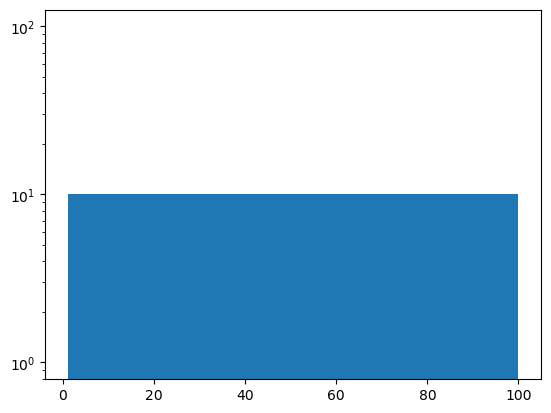

data: [
  "histogram with fields type, x, and y"
]

layout: "layout with fields margin and template"

In [ ]:
using PyPlot
data = [i for i in 1:100]
PyPlot.hist(data,)
yscale("log")
using PlotlyJS
PlotlyJS.plot(data, kind="histogram")

などと異なるコマンドや引数を取る。しかし、Plots.jlを使用すると

In [ ]:
using Plots
Plots.PyPlotBackend()
#Plots.PlotlyJSBackend()
data = [i for i in 1:100]
histogram(data,xscale=:log10)


┌ Warning: No strict ticks found
└ @ PlotUtils /home/yuki/.julia/packages/PlotUtils/VgXdq/src/ticks.jl:294
┌ Warning: No strict ticks found
└ @ PlotUtils /home/yuki/.julia/packages/PlotUtils/VgXdq/src/ticks.jl:294


のように、共通のコマンドとオプションを使用してPlotlyやPyPlotsで書かれた図を作成することが出来る。つまり、Plotsを習得することによって、自身が作成することが出来る図の種類が必要最小限の努力で最大化することが出来る。


## install
下記のコマンドを実行する。[公式 install guide](http://docs.juliaplots.org/latest/install/)

In [ ]:
using Pkg
Pkg.add("Plots")
#使用するバックエンドのパッケージを適宜インストールする
Pkg.add("GR");Pkg.add("PyPlot")
# バックエンドを指定する
Plots.GRBackend()

    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
Precompiling project...
  ✓ Contour
  ✓ Plots
  ✓ StatsPlots
  3 dependencies successfully precompiled in 35 seconds (415 already precompiled, 1 skipped during auto due to previous errors)
  1 dependency precompiled but a different version is currently loaded. Restart julia to access the new version
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
Precompiling project...
  ✓ StatsPlots
  1 dependency successfully precompiled in 7 seconds (417 already precompiled, 1 skipped during auto due to previous errors)
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~

Plots.GRBackend()



## 使い方

### 1. ラインプロット (line plot)
line plotは、x軸方向のデータの順番とyの関係が重要な時に使用される。例えば、自己相関や速度の時間発展などの可視化に使用される。Juliaでは、'plot'という関数を使用することで図示を行うことが出来る。

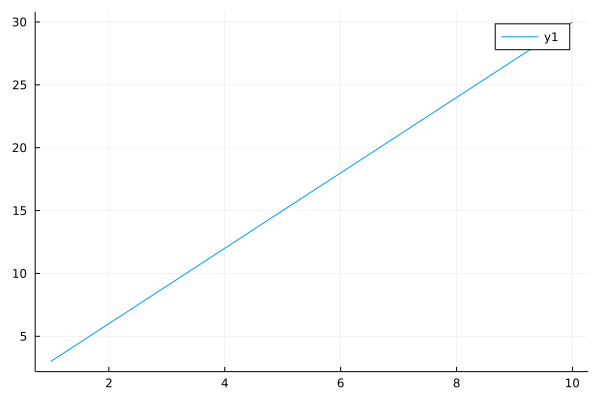

In [1]:
using Plots;Plots.GRBackend()
x = [i for i in 1:0.1:10]
y = x .*3
plot(x,y)

グラフを書くときには、必ず凡例と軸ラベル(とタイトル)は設定する。まず、それらの設定方法について説明しよう。Juliaでは、下記の引数を調整することによって実行される
|引数|反映される内容|
|---|---|
|title|入力値がタイトルに出力される|
|xlabel|x軸に入力値が出力される|
|ylabel|y軸に入力値が出力される|
|label|入力値が凡例として出力される|
|legend|シンボルで指定されている場所に凡例が出力される|

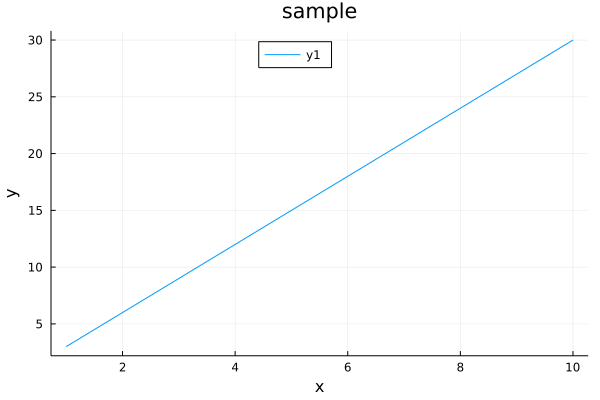

In [2]:
x = [i for i in 1:0.1:10]
y = x .*3
plot(x,y,title ="sample", ylabel="y", xlabel="x",lagel="test", legend =:top)
#plot(x,y,title ="sample", ylabel="y", xlabel="x",lagel="test", legend =:right)
#plot(x,y,title ="sample", ylabel="y", xlabel="x",lagel="test", legend =:left)



次に、linestyleの変更方法について説明しよう。Juliaでは5種類のlinestyleが提供されている。そのlinestyleを変更するためには、'linestyle'の引数を下記のシンボルに変更すればよい。
|シンボル|反映される内容|
|---|---|
|:solid|直線に変更|
|:dash|破線に変更|
|:dot|更に細かい破線に変更|
|:dashdot|もっと更に細かい破線に変更|
|:dashdotdot|もっともっと細かい破線に変更|

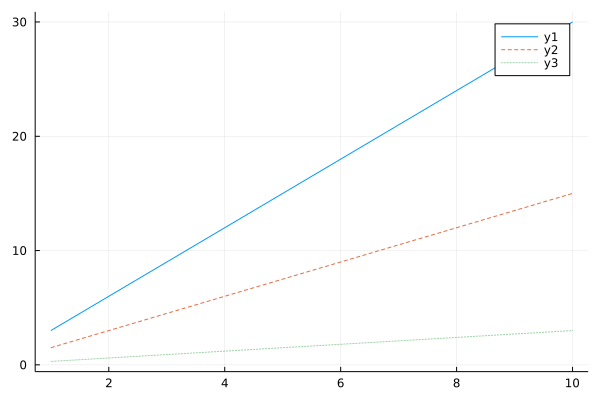

In [3]:
x = [i for i in 1:0.1:10]
y = x .*3
plot(x,y)
plot!(x,y./2,linestyle =:dash)
plot!(x,y./10,linestyle =:dot)

Juliaでは、24種類のmarkerが提供されている。markerを変更するためには、plotの引数である'marker'を変更すればいい。サポートされているmarkerは'Plots.supported_markers()'から確認することが出来る。書くのは面倒なので、自分で確認してください。

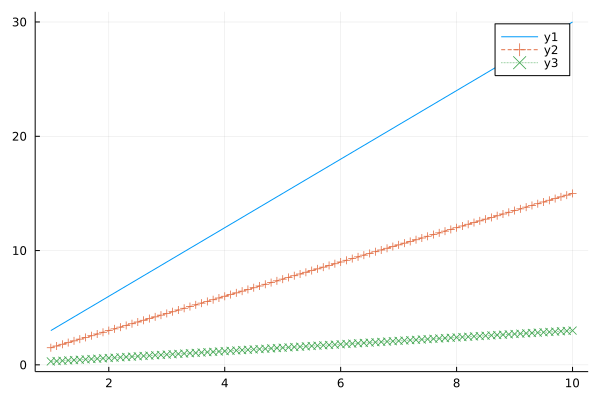

In [ ]:
x = [i for i in 1:0.1:10]
y = x .*3
plot(x,y)
plot!(x,y./2,linestyle =:dash,marker=:+)
plot!(x,y./10,linestyle =:dot,marker=:x)

破線などの色を変更するためには、plotの引数である'color'を変更すればいい。colorは、「string型で色名を指定する」あるいは「色コードを指定する」の2通りで変更することが出来る。

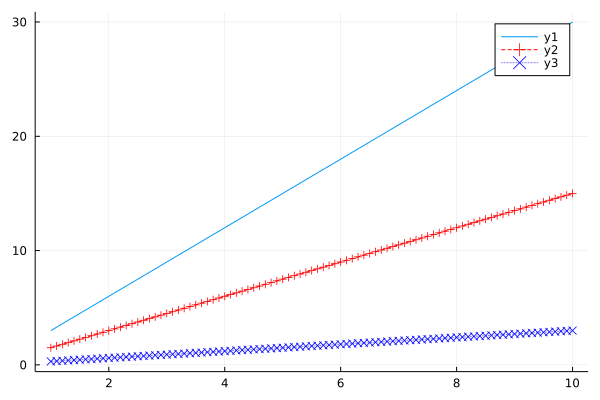

In [5]:
x = [i for i in 1:0.1:10]
y = x .*3
plot(x,y)
plot!(x,y./2,linestyle =:dash,marker=:+,color="red")
plot!(x,y./10,linestyle =:dot,marker=:x,color="blue")

次に軸のscale変更の方法について説明しよう。軸のスケールを変更するためには、plotの引数である'yscale','xscale','zscale'にシンボルを入力する。
|シンボル|反映される内容|
|---|---|
|:ln|軸のスケールを$\log_e$スケールに変更|
|:log|軸のスケールを$\log_e$スケールに変更|
|:log2|軸のスケールを$\log_2$スケールに変更|
|:log10|軸のスケールを$\log_{10}$スケールに変更|


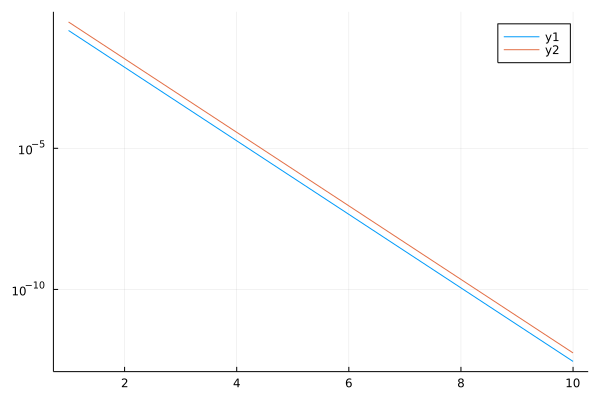

In [8]:
x = [i for i in 1:0.1:10]
y = exp.(- x.*3) .*3
plot(x, y, yscale=:log10)
plot!(x, y.*2, yscale=:log10)


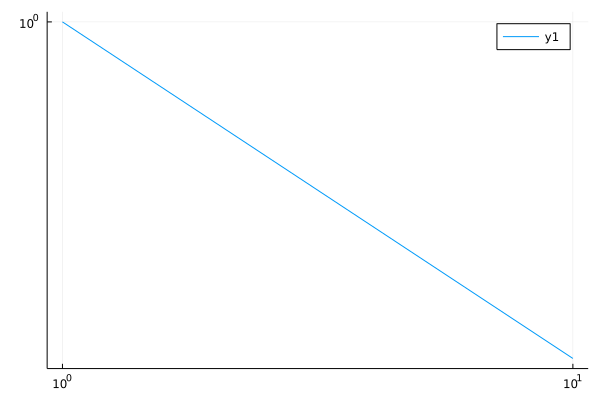

┌ Warning: No strict ticks found
└ @ PlotUtils /home/yuki/.julia/packages/PlotUtils/VgXdq/src/ticks.jl:294
┌ Warning: No strict ticks found
└ @ PlotUtils /home/yuki/.julia/packages/PlotUtils/VgXdq/src/ticks.jl:294


In [9]:
plot(x, x.^-0.5, yscale=:log10,xscale=:log10)


次に、error barの引き方について説明しよう。例えば、下記のような観測データ値が観測されたとき
$$
C(\tau) = \gamma\tau^{-\alpha}+ \epsilon
$$
この関係式を可視化するときlog-log scaleにすると
$$
\ln C(\tau) = \ln\gamma -\alpha \ln\tau+ \epsilon
$$
という関係式が得られることが期待されるのだが、$\tau$が大きい領域で$C(\tau)=\gamma\tau^{-\alpha}+ \epsilon<0$が観測されることがある。このとき、log-log-scaleのプロットではきれいに表示することができないので、$C(\tau)<0$を満たす点を除外する方法の他に移動平均を取るという手法が取られることがある。そこで、ここでは移動平均を取った場合(binningを行なった場合)の図示の方法について説明する。binningを行なった時に同時に表示するべきもの
1. 周辺の平均値: 平均的な値を示すため
2. 標準誤差: そのbin内での散らばりを示すため

の2要素だ。不幸なことに、Juliaではこれらの2要素を自動で計算してくれるパッケージは私が知る限り存在しない。そのため、それに関して手動で実装する必要がある。Binningの実装の一例として、下記の関数を例としてあげよう。

In [6]:
function binning(x::Vector,y::Vector, num)::Tuple{Vector{Float64},Vector{Float64},Vector{Float64} }
    p::Vector{Int64} = sortperm(x)
    x_::Vector{Float64} = x[p]
    y_::Vector{Float64} = y[p]
    step::Float64 = (x_[end] - x_[1])/(num)
    start::Float64 = x_[1] + step
    x_save::Vector{Float64} = zeros(Float64,num+1)
    y_save::Vector{Float64} = zeros(Float64,num+1)
    y_err::Vector{Float64}  = zeros(Float64,num+1)
    P::Vector{Bool} = zeros(Bool,num+1)
    n::Int64 = 1
    Y::Float64 = 0
    Y2::Float64 = 0
    N::Int64 = 0
    for i in 1:length(x)
        while x_[i] > start
            x_save[n] = start - step/2
            y_save[n] = Y/N
            y_err[n] = sqrt( Y2/(N)-(Y/N)^2 )/sqrt(N)
            P[n] = (N!=0)
            Y = 0
            Y2 = 0
            start += step
            n += 1
            N=0
        end
        Y2 += y_[i]^2
        Y += y_[i]
        N += 1
    end
    x_save[n] = start - step/2
    y_save[n] = Y/N
    y_err[n] = sqrt( Y2/(N)-(Y/N)^2 )/sqrt(N)
    P[n] = (N!=0)
            
    return x_save[P], y_save[P],y_err[P]
end

binning (generic function with 1 method)

Juliaでは、error barの表示は オプションの引数'xerror, yerror, zerror'の値を調整することによって表示する。今回の場合だと



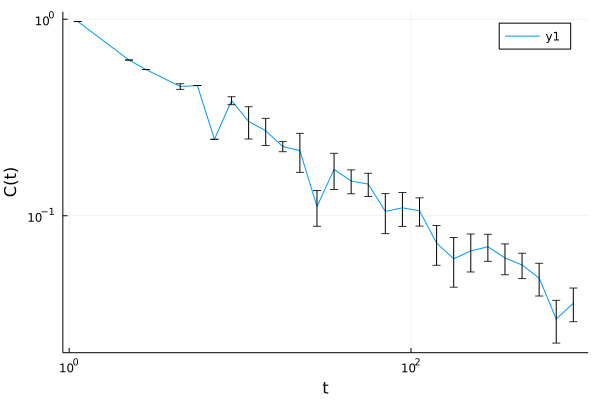

In [15]:
using Distributions
x = [i for i in 1:1000]
y = x.^-0.5  + rand(Normal(0,0.1),length(x))
a,b,c=binning(log10.(x),y, 30)
plot(10 .^a,b,yerror=c,yscale=:log10,xscale=:log10,ylabel="C(t)",xlabel="t")

### 2. 散布図 (scatter plot)
散布図は、2次元あるいは3次元空間において観測値x,y,zの定性的な性質を知ろうとする際に役に立つ。Juliaでは、散布図を書くときには'scatter'という関数から散布図を書くことが出来る。また、lineplotで紹介したほとんどの引数は使用することが出来る。ここでは、iris datasetを使用した例を説明しよう。

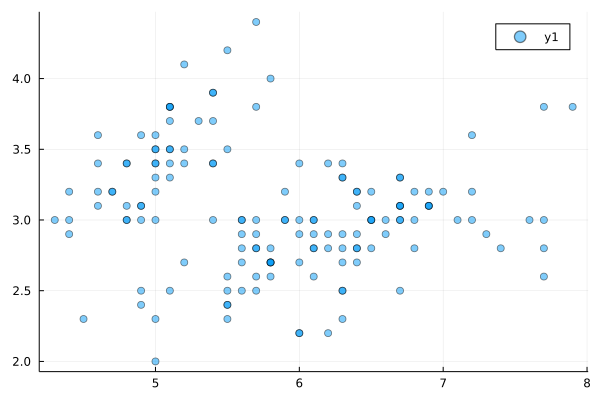

In [16]:
#RDatasetsをインストールしていない場合は
#using Pkg;Pkg.add("RDatasets")
using RDatasets, DataFrames
iris = dataset("datasets", "iris")
scatter(iris.SepalLength,iris.SepalWidth)
#重なって見にくいときは、 alphaの値を調整することでscatter plotを透明に出来る
scatter(iris.SepalLength,iris.SepalWidth, alpha = 0.5)


iris datasetには、皆さんご存知のように品種のラベルがついている。そして、そのラベルごとに統計的な性質が大きく異なる。Plotでは、groupに属性情報を入力することによってを変更することが出来る。

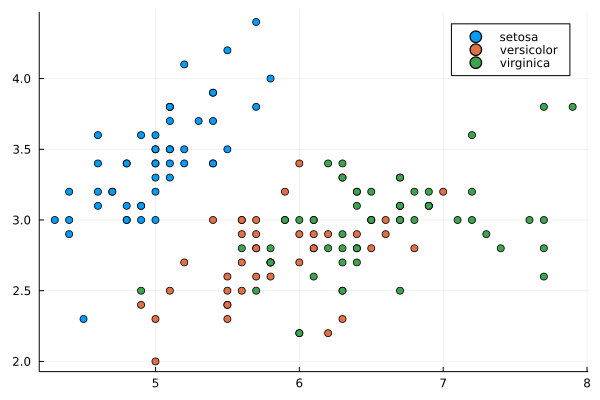

In [17]:
scatter(iris.SepalLength,iris.SepalWidth, group = iris.Species)

次に、scatter plotでmarkerの色にグラデーションをつける方法について説明しよう。グラデーションをつけるという手法はAとBの要因 + 第3の要因について部席したい時に有効である。例えば、国語と数学のテストの相関を分析したい状況を考えよう。国語と数学のテストの結果について単純な相関分析を行い結論付けることも可能だが (全く望ましくないが)、高い相関を得た要因に勉強時間の長さが影響観測値に影響を与えている場合がある。そのようなものを視覚的に確かめる際には、観測したい変数A, Bのscatter plot+ 要因Cについてグラデーションをつけるとよい。Plotsでは、'marker_z'に変数を与えるとグラデーションになる.

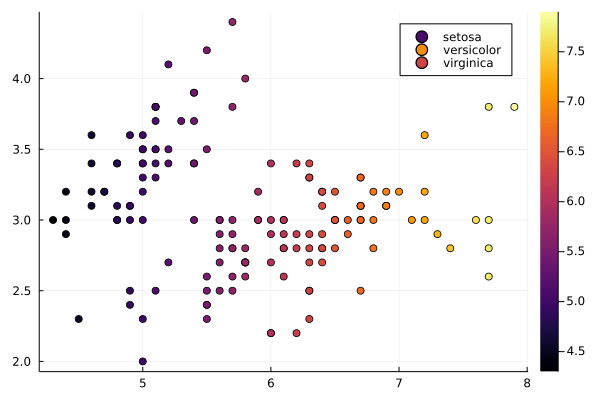

In [18]:
scatter(iris.SepalLength,iris.SepalWidth,marker_z = iris.SepalLength, group = iris.Species)



### 3. ヒストグラム (histogram)
ヒストグラムは1変数の分布を見るのに便利な可視化ツールである。Juliaでは、'histogram'という関数を使用することによって可視化を行うことが出来る。


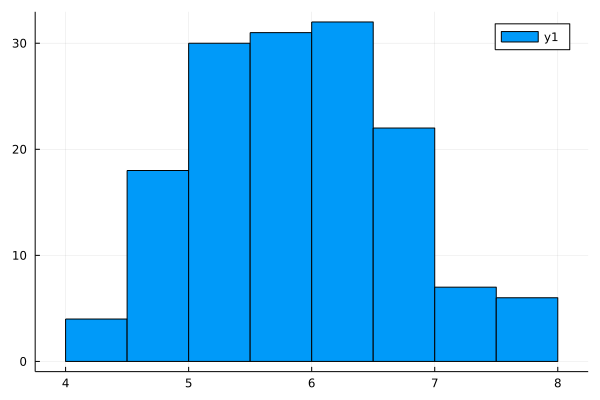

In [19]:
histogram(iris.SepalLength)

ヒストグラムを書く上で重要なことは、bin sizeの決定だ。一般的には、データ数Nに対してbin sizeは$\sqrt{N}$程度にすると良いと言われている。Juliaではbin sizeの指定は'bins'で指定する。

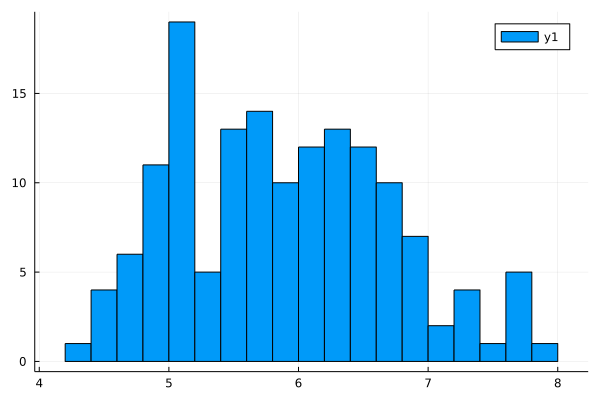

In [20]:
histogram(iris.SepalLength, bins = 30)

また、binsにはvectorを渡すことも出来る。vectorを渡すと、区間[v[1],v[2]],[v[2],v[3]]..., [v[n-1],v[n]]でbinが区切られる。べき分布など特徴的な分布を可視化したい時に便利だろう。

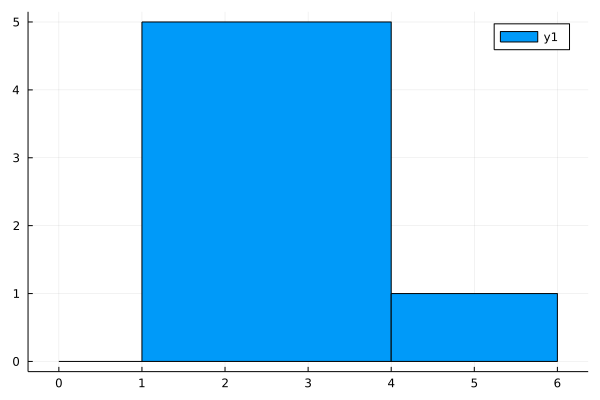

In [21]:
histogram([1,2,1,1,4,3,8],bins = [0,1,4,6])


histogramでも同様にgroupのコマンドは提供されている。


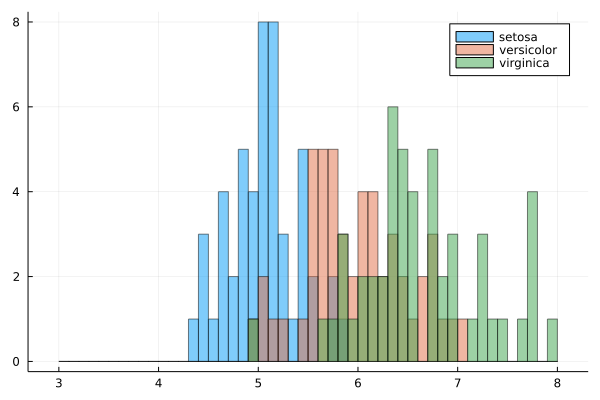

In [33]:
histogram(iris.SepalLength, 
                group = iris.Species,
                bins = [i for i in 3:.1:8],alpha = 0.5
                )




残念ながら、JuliaではCDFはサポートされていない。そのため、自分で関数を作成する必要がある。


In [24]:

function RCDF(x::Vector,complementary::Bool = true)::Tuple{Vector{Float64}, Vector{Float64}} 
    if complementary
        return sort(x), [i for i in length(x):-1.0:1]
    else
        return sort(x), [i for i in 1.0:1.0:length(x)]
    end
end


RCDF (generic function with 2 methods)


2次元ヒストグラムを書きたければ、'histogram2d'を使用すれば良い。自由度が少ないので、紹介するような機能はない。

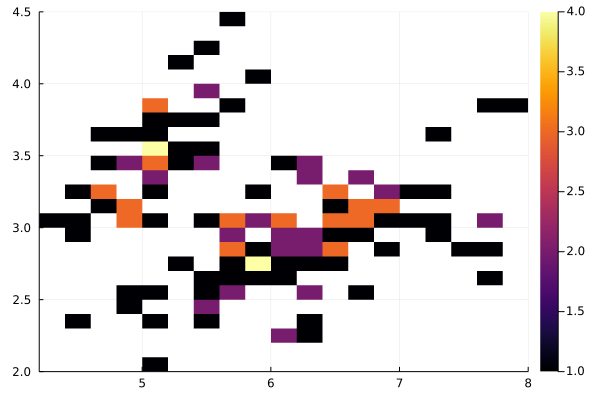

In [34]:
histogram2d(iris.SepalLength,iris.SepalWidth, bins =30 )


In [60]:
using Statistics
c = hcat(iris.SepalLength, iris.SepalWidth)
c[:,1] = c[:,1].-mean(c[:,1])
c[:,2] = c[:,2].-mean(c[:,2])
cov = c' * c

2×2 Matrix{Float64}:
 102.168    -6.32267
  -6.32267  28.3069

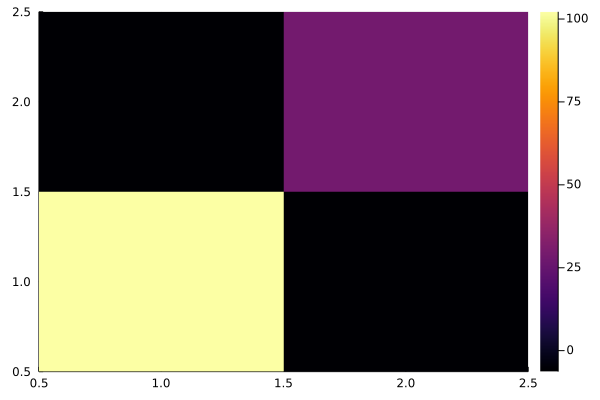

In [61]:
heatmap(cov)